## 예제 5-1 모의자료 분류

In [20]:
from tensorflow.keras import datasets, layers, models, regularizers, optimizers

In [23]:
EPOCHS=50
NUM_CLASSES = 10
BATCH_SIZE = 128
    

In [21]:
def load_data():
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
 
    #normalize 
    mean = np.mean(x_train,axis=(0,1,2,3))
    std = np.std(x_train,axis=(0,1,2,3))
    x_train = (x_train-mean)/(std+1e-7)
    x_test = (x_test-mean)/(std+1e-7)
 
    y_train =  tf.keras.utils.to_categorical(y_train,NUM_CLASSES)
    y_test =  tf.keras.utils.to_categorical(y_test,NUM_CLASSES)

    return x_train, y_train, x_test, y_test


In [24]:
(x_train, y_train, x_test, y_test) = load_data()

In [25]:
x_train.shape[1:]

(32, 32, 3)

In [26]:
type(x_train)

numpy.ndarray

In [27]:
x_train.shape

(50000, 32, 32, 3)

In [1]:
import numpy as np
import tensorflow as tf
#from libs.connections import linear
from keras.utils import np_utils
import matplotlib.pyplot as plt

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
# true images
A=np.array([[0,0,0,0,0,0], [0,1,0,0,0,0],[0,1,1,0,0,0],[0,1,0,1,0,0],[0,1,0,0,1,0],[0,0,0,0,0,0]])
B=np.array([[0,0,0,0,0,0], [0,0,0,0,1,0],[0,0,0,0,1,0],[0,0,0,0,1,0],[0,1,1,1,1,0],[0,0,0,0,0,0]])

In [3]:
# 훈련 데이터 생성 
trainX=np.zeros((20,36))
for i in range(10):
    trainX[i,:]=A.reshape(1,6*6)
    trainX[i+10,:]=B.reshape(1,6*6)
train_x=trainX.reshape(720,1)
noise=np.random.choice(np.arange(2), 720, replace=True,p=[0.9,0.1])
v=np.where(noise>0)
train_x[v]=np.abs(train_x[v]-1)
trainX=train_x.reshape(20,36)
train_y=np.concatenate((np.ones((10,1)),np.zeros((10,1))),axis=0)
train_y=np.array(train_y, np.int64)
trainY = np_utils.to_categorical(train_y, 2)

In [4]:
print(np.array(trainX).shape)
print(np.array(trainY).shape)

(20, 36)
(20, 2)


In [5]:
print(trainX[0])

[0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
print(trainY[0])

[0. 1.]


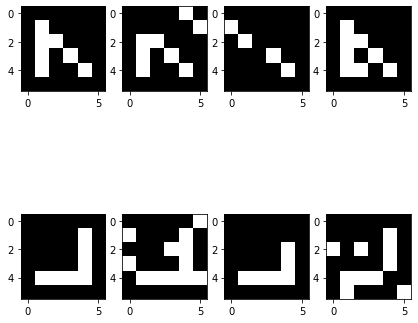

In [7]:
# 훈련 데이터 이미지
f,axes =plt.subplots(figsize=(7,7), nrows=2, ncols=4, sharey=True, sharex=True)
for ii in range(8):
    plt.subplot(2,4,ii+1); 
    if ii<4: 
         if ii==0: plt.imshow(A,cmap='gray', interpolation='none')
         else: plt.imshow(trainX[ii,:].reshape(6,6),cmap='gray', interpolation='none')
    else: 
        if ii==4: plt.imshow(B,cmap='gray', interpolation='none')
        else: plt.imshow(trainX[ii+5,:].reshape(6,6),cmap='gray', interpolation='none')

In [8]:
learning_rate=0.01; epochs=20
#X=tf.placeholder(tf.float32,[None,36])
#X_img=tf.reshape(X,[-1,6,6,1]) 
#Y=tf.placeholder(tf.float32,[None,2])
trainX = trainX.reshape([-1,6,6,1])

In [15]:
print(trainX.shape)

(20, 6, 6, 1)


In [9]:
# 합성곱에 사용하는 필터 크기와 개수, 보폭 지정
#K1=tf.Variable(tf.random_normal([4,4,1,4],stddev=0.01))
#a1=tf.nn.conv2d(X_img, K1, strides=[1,1,1,1], padding='VALID')
# 활성화함수 지정 
#a1=tf.nn.relu(a1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(5,5), strides=1, input_shape=(6,6,1), padding='valid', activation='relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
# 배치정규화 
#a1=tf.layers.batch_normalization(a1, training=True)
model.add(tf.keras.layers.BatchNormalization())

In [11]:
# 풀링의 종류와 크기, 보폭 지정 
#h1=tf.nn.max_pool(a1,ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

In [12]:
# 합성층의 마지막 부분을 1D로 변환
#Flat=tf.reshape(h1,[-1,np.prod(h1.get_shape().as_list()[1:4])])
model.add(tf.keras.layers.Flatten())

In [13]:
# 완전 연결 신경망의 은닉층의 구조 지정
#W1=tf.get_variable("W1",shape=[np.prod(h1.get_shape().as_list()[1:4]),10],initializer=tf.contrib.layers.xavier_initializer())
#b1=tf.Variable(tf.random_normal([10]))
#L1=tf.matmul(Flat, W1)+b1
# 최종 출력을 위해 소프트맥스함수 지정
#pred =linear(L1, 2, activation=tf.nn.softmax)
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 2, 2, 4)           104       
_________________________________________________________________
batch_normalization (BatchNo (None, 2, 2, 4)           16        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 4)           0         
_________________________________________________________________
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 2)                 10        
Total params: 130
Trainable params: 122
Non-trainable params: 8
_________________________________________________________________


In [16]:
#cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=Y))
#optim=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
#correct_predict=tf.equal(tf.argmax(pred,1), tf.argmax(Y,1))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

In [19]:
model.fit(trainX, trainY, epochs=epochs)

Epoch 1/20
20/20 [==============================] - 4s 188ms/sample - loss: 0.2052 - acc: 0.9500
Epoch 2/20
20/20 [==============================] - 0s 987us/sample - loss: 0.1257 - acc: 1.0000
Epoch 3/20
20/20 [==============================] - 0s 399us/sample - loss: 0.0836 - acc: 1.0000
Epoch 4/20
20/20 [==============================] - 0s 250us/sample - loss: 0.0617 - acc: 1.0000
Epoch 5/20
20/20 [==============================] - 0s 150us/sample - loss: 0.0497 - acc: 1.0000
Epoch 6/20
20/20 [==============================] - 0s 201us/sample - loss: 0.0417 - acc: 1.0000
Epoch 7/20
20/20 [==============================] - 0s 150us/sample - loss: 0.0352 - acc: 1.0000
Epoch 8/20
20/20 [==============================] - 0s 209us/sample - loss: 0.0300 - acc: 1.0000
Epoch 9/20
20/20 [==============================] - 0s 100us/sample - loss: 0.0257 - acc: 1.0000
Epoch 10/20
20/20 [==============================] - 0s 149us/sample - loss: 0.0222 - acc: 1.0000
Epoch 11/20
20/20 [==========

In [23]:
np.argmax(model.predict(trainX), axis=1) == np.argmax(trainY, axis=1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## 예제 5-2 MNIST 손글씨 숫자 분류

In [1]:
import numpy as np
import tensorflow as tf
#from libs.connections import linear 
import matplotlib.pyplot as plt
import datetime

In [2]:
# 자료 입력
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [3]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


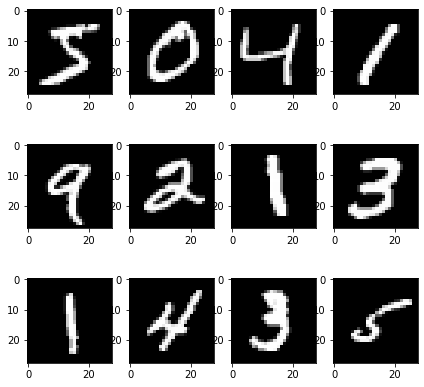

In [4]:
# 훈련 데이터 이미지
f,axes =plt.subplots(figsize=(7,7), nrows=3, ncols=4, sharey=True, sharex=True)
for ii in range(12):
    plt.subplot(3,4,ii+1)
    plt.imshow(X_train[ii].reshape(28,28),cmap='Greys_r')

In [5]:
learning_rate=0.001; epochs=10; batch_size=100
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
model = tf.keras.Sequential()
# 첫 번째 합성곱층에 사용하는 필터 크기와 개수, 보폭 지정
# 첫 번째 합성곱층의 활성화함수 지정 
model.add(tf.keras.layers.Conv2D(filters=20, kernel_size=(5,5), strides=1, input_shape=X_train.shape[1:], padding='valid', activation='relu'))
# 배치정규화 
model.add(tf.keras.layers.BatchNormalization())
# 첫 번째 풀링층에 사용하는 풀링의 종류와 크기, 보폭 지정
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), padding='valid'))
# 두 번째 합성곱층에 사용하는 필터 크기와 개수, 보폭 지정
# 두 번째 합성곱층의 활성화함수 지정
model.add(tf.keras.layers.Conv2D(filters=50, kernel_size=(5,5), strides=1, padding='valid', activation='relu'))
# 배치정규화 
model.add(tf.keras.layers.BatchNormalization())
# 두 번째 풀링층에 사용하는 풀링의 종류와 크기, 보폭 지정
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), padding='valid'))
#두 번째 풀링층의 출력을 1D로 변환
model.add(tf.keras.layers.Flatten())
#완전 연결 신경망의 은닉층의 구조 지정
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 20)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 50)          25050     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 50)          200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

In [9]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

In [10]:
import os
log_dir = os.path.join("logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [11]:
log_dir

'logs\\20200713-131250'

In [12]:
os.getcwd()

'D:\\project\\python\\golbin\\DeepLearningWithTnesorFlow\\5'

In [13]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [14]:
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, callbacks=[tensorboard_callback])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1250 - accuracy: 0.9620
Epoch 2/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0405 - accuracy: 0.9875
Epoch 3/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0259 - accuracy: 0.9917
Epoch 4/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0207 - accuracy: 0.9934
Epoch 5/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0143 - accuracy: 0.9954
Epoch 6/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0102 - accuracy: 0.9967
Epoch 7/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0099 - accuracy: 0.9967
Epoch 8/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0076 - accuracy: 0.9976
Epoch 9/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0082 - accuracy: 0.9969
Epoch 10/10
60

In [15]:
# 훈련 데이터의 예측 정확도
sum(np.argmax(model.predict(X_train), axis=1) == np.argmax(Y_train, axis=1)) / 60000

0.99765

In [16]:
# 검정 데이터의 예측 정확도
sum(np.argmax(model.predict(X_test), axis=1) == np.argmax(Y_test, axis=1)) / 10000

0.9877

In [19]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [20]:
#log_dir = 'D:\\project\\python\\golbin\\DeepLearningWithTnesorFlow\\5\\logs\\20200713-131250'
#log_dir = 'D:/project/python/golbin/DeepLearningWithTnesorFlow/5/logs/20200713-130406'
%tensorboard --logdir {log_dir}

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 8912.

## 예제 5-3 MNIST 손글씨 숫자 분류(ResNet)

In [1]:
import numpy as np
import tensorflow as tf
from collections import namedtuple
from tensorflow.keras.layers import Conv2D, MaxPool2D
import datetime

In [2]:
# 자료 입력
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [3]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


In [4]:
learning_rate=0.001; epochs=10; batch_size=100
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [6]:
learning_rate=0.001; epochs=10; batch_size=100
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [7]:
# ResNet 블록 구조(bottleneck 구조) 
LayerBlock = namedtuple('LayerBlock', ['num_repeats', 'num_filters', 'bottleneck_size'])
blocks = [LayerBlock(3, 128, 32),LayerBlock(3, 256, 64),LayerBlock(3, 512, 128),
          LayerBlock(3, 1024, 256)]

In [8]:
blocks

[LayerBlock(num_repeats=3, num_filters=128, bottleneck_size=32),
 LayerBlock(num_repeats=3, num_filters=256, bottleneck_size=64),
 LayerBlock(num_repeats=3, num_filters=512, bottleneck_size=128),
 LayerBlock(num_repeats=3, num_filters=1024, bottleneck_size=256)]

In [9]:
blocks[0].num_filters

128

In [10]:
inputs = tf.keras.Input(shape=X_train.shape[1:])
print(inputs.shape, 'inputs; Input(shape=',X_train.shape[1:],')')
# 채널수 64의 합성곱 출력을 만들고 다운샘플링
net = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding='same', activation='relu', name='conv1')(inputs)
print(net.shape, 'net; Conv2D(filters=64, kernel_size=(7,7), strides=2, padding=''same'')')

net = MaxPool2D(pool_size=(3,3), strides=(2, 2), padding='same')(net)
print(net.shape, 'net; MaxPool2D(pool_size=(3,3), strides=(2, 2), padding=''same'')')

# ResNet 블록구조의 입력 생성 
net = Conv2D(128, kernel_size=(1,1), strides=1, padding='valid', name='conv2')(net)
print(net.shape, 'net; Conv2D(128, kernel_size=(1,1), strides=1, padding=''valid'')')

# ResNet 블록 반복 
for block_i, block in enumerate(blocks):
    for repeat_i in range(block.num_repeats):
        name = 'block_%d/repeat_%d' % (block_i, repeat_i)
        print(block_i, repeat_i, net.shape, 'net')
        conv1 = Conv2D(filters=block.bottleneck_size, 
                       kernel_size=(1,1), padding='valid', strides=1, 
                       activation='relu', name=name + '/conv_in')(net)
        print(block_i, repeat_i, conv1.shape, 'conv1; Conv2D(filters=',block.bottleneck_size,', kernel_size=(1,1), padding=''valid'', strides=1)')

        conv2 = Conv2D(filters=block.bottleneck_size,
                       kernel_size=(3,3), padding='same', strides=1,
                       activation='relu', name=name + '/conv_bottleneck')(conv1)
        print(block_i, repeat_i, conv2.shape, 'conv2; Conv2D(filters=',block.bottleneck_size,', kernel_size=(3,3), padding=''same'', strides=1)')

        conv3 = Conv2D(filters=block.num_filters,
                       kernel_size=(1,1), padding='valid', strides=1,
                       activation='relu', name=name + '/conv_out')(conv2)
        print(block_i, repeat_i, conv3.shape, 'conv3; Conv2D(filters=',block.num_filters,', kernel_size=(1,1), padding=''valid'', strides=1)')
        net = conv3 + net

    try:
        # upscale to the next block size
        next_block = blocks[block_i + 1]
        net = Conv2D(filters=next_block.num_filters,
                     kernel_size=(1,1), padding='same', strides=1, use_bias=False,
                     name='block_%d/conv_upscale' % block_i)(net)
        print(block_i, net.shape, 'net; Conv2D(filters=', next_block.num_filters, ', kernel_size=(1,1), padding=''same'', strides=1)')
    except IndexError:
        print("IndexError")
        pass

# 평균 풀링을 이용하여 블록 구조의 최종 출력의 차원 변환
net = tf.keras.layers.AveragePooling2D(pool_size=(net.shape[1],net.shape[2]), strides=1, padding='valid')(net)
print(net.shape, 'net; AveragePooling2D(pool_size=(',net.shape[1],',',net.shape[2],'), strides=1, padding=''valid'')')

#ResNet 블록 구조의 최종 출력을 1D로 변환
Flat=tf.keras.layers.Flatten()(net)
print(Flat.shape, 'Flat; Flatten()')
# 최종 출력을 위해 소프트맥스함수 지정
Y_pred=tf.keras.layers.Dense(10, activation='softmax')(Flat)
print(Y_pred.shape, 'Y_pred; Dense(10, activation=''softmax'')')

(None, 28, 28, 1) inputs; Input(shape= (28, 28, 1) )
(None, 14, 14, 64) net; Conv2D(filters=64, kernel_size=(7,7), strides=2, padding=same)
(None, 7, 7, 64) net; MaxPool2D(pool_size=(3,3), strides=(2, 2), padding=same)
(None, 7, 7, 128) net; Conv2D(128, kernel_size=(1,1), strides=1, padding=valid)
0 0 (None, 7, 7, 128) net
0 0 (None, 7, 7, 32) conv1; Conv2D(filters= 32 , kernel_size=(1,1), padding=valid, strides=1)
0 0 (None, 7, 7, 32) conv2; Conv2D(filters= 32 , kernel_size=(3,3), padding=same, strides=1)
0 0 (None, 7, 7, 128) conv3; Conv2D(filters= 128 , kernel_size=(1,1), padding=valid, strides=1)
0 1 (None, 7, 7, 128) net
0 1 (None, 7, 7, 32) conv1; Conv2D(filters= 32 , kernel_size=(1,1), padding=valid, strides=1)
0 1 (None, 7, 7, 32) conv2; Conv2D(filters= 32 , kernel_size=(3,3), padding=same, strides=1)
0 1 (None, 7, 7, 128) conv3; Conv2D(filters= 128 , kernel_size=(1,1), padding=valid, strides=1)
0 2 (None, 7, 7, 128) net
0 2 (None, 7, 7, 32) conv1; Conv2D(filters= 32 , kernel_s

In [11]:
model = tf.keras.Model(inputs, Y_pred)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 14, 14, 64)   3200        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 7, 7, 64)     0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 7, 7, 128)    8320        max_pooling2d[0][0]              
______________________________________________________________________________________________

In [12]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

In [13]:
log_dir = "logs\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [14]:
log_dir

'logs\\20200713-131654'

In [15]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [16]:
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, callbacks=[tensorboard_callback])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 37s 622us/sample - loss: 1.4880 - accuracy: 0.8701
Epoch 2/10
60000/60000 [==============================] - 33s 552us/sample - loss: 0.0790 - accuracy: 0.9756
Epoch 3/10
60000/60000 [==============================] - 34s 566us/sample - loss: 0.0553 - accuracy: 0.9829
Epoch 4/10
60000/60000 [==============================] - 34s 563us/sample - loss: 0.0480 - accuracy: 0.9856
Epoch 5/10
60000/60000 [==============================] - 34s 561us/sample - loss: 0.0474 - accuracy: 0.9853
Epoch 6/10
60000/60000 [==============================] - 34s 560us/sample - loss: 0.0497 - accuracy: 0.9850
Epoch 7/10
60000/60000 [==============================] - 33s 555us/sample - loss: 0.0501 - accuracy: 0.9856
Epoch 8/10
60000/60000 [==============================] - 33s 553us/sample - loss: 0.0621 - accuracy: 0.9825
Epoch 9/10
60000/60000 [==============================] - 33s 553us/sample - loss: 0.0602 - accuracy: 0.9

In [17]:
# 훈련 데이터의 예측 정확도
sum(np.argmax(model.predict(X_train), axis=1) == np.argmax(Y_train, axis=1)) / 60000

0.9902833333333333

In [18]:
# 검정 데이터의 예측 정확도
sum(np.argmax(model.predict(X_test), axis=1) == np.argmax(Y_test, axis=1)) / 10000

0.9856

In [30]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 24388.

In [60]:
class ResNet(tf.keras.Model):
    def __init__(self, **kwargs):
        super(ResNet, self).__init__(**kwargs)
        
    def call(self, x):
        return x
    
    def build_graph(self, input_shape): 
        input_shape_nobatch = input_shape[1:]
        self.build(input_shape)
        inputs = tf.keras.Input(shape=input_shape_nobatch)
        
        if not hasattr(self, 'call'):
            raise AttributeError("User should define 'call' method in sub-class model!")
        
        _ = self.call(inputs)